# Text Classification

### Goal: Given a set of text movie reviews, we're to create a model that can predict which review is positive and which is negative

In [1]:
df = pd.read_csv('moviereviews.csv')

In [40]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [42]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [43]:
df = df.dropna()

We can check for any reviews that are not just NaN but outrightly blank, and if found, we would proceed to remove them from the dataset.

In [44]:
df['review'].str.isspace().sum()

27

In [45]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [46]:
df = df.drop(df[df['review'].str.isspace()].index, axis=0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [48]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

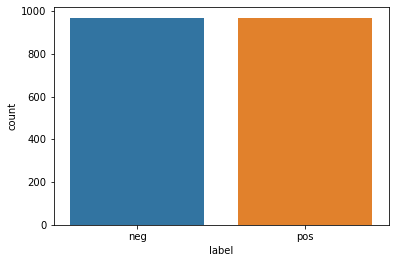

In [152]:
sns.countplot(data=df, x='label')

In [153]:
#We can see that it is a pretty balanced target column which is very good, especially for our future accuracy values

We can use the CountVectorizer model to check for the top 20 words per label type.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
cv = CountVectorizer(stop_words='english')

In [52]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [53]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Train | Test Split

In [54]:
X = df['review']
y = df['label']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Training Models

**We'll be creating pipelines that will both create a TF-IDF Vector out of the raw text data and fit the training data on  some supervised learning models. The supervised learning models we will use for this project will be LinearSVC, MultinomialNB, KNN and LogisticRegression.**

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [126]:
svc_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('svc', LinearSVC(max_iter=100000))])

In [127]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC(max_iter=100000))])

In [91]:
bayes_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('bayes', MultinomialNB())])

In [92]:
bayes_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('bayes', MultinomialNB())])

In [93]:
log_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('log', LogisticRegression())])

In [94]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('log', LogisticRegression())])

In [95]:
knn_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('knn', KNeighborsClassifier())])

In [96]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('knn', KNeighborsClassifier())])

## Evaluating models' performance

For simplicity reasons, we'll create a model that predicts the test data on each respective report, creates a classification model and also plots a confusion matrix for each of them in order to evaluate each models' performance and decipher which one of them performs best.

In [101]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_predictions(y_test, preds)

Naive Bayes model
              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



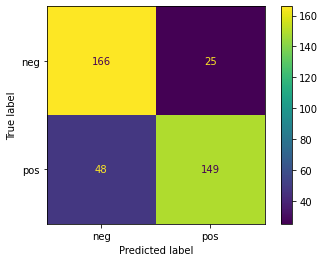

In [102]:
print('Naive Bayes model')
report(bayes_pipe)

Logistic Regression model
              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



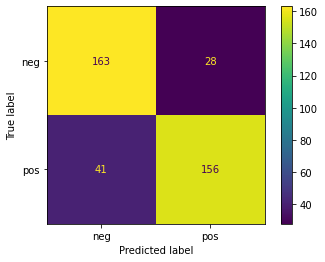

In [103]:
print('Logistic Regression model')
report(log_pipe)

Linear SVC model
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



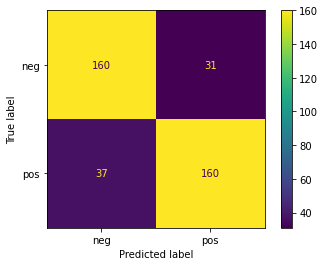

In [129]:
print('Linear SVC model')
report(svc_pipe)

KNN model
              precision    recall  f1-score   support

         neg       0.68      0.62      0.65       191
         pos       0.66      0.72      0.69       197

    accuracy                           0.67       388
   macro avg       0.67      0.67      0.67       388
weighted avg       0.67      0.67      0.67       388



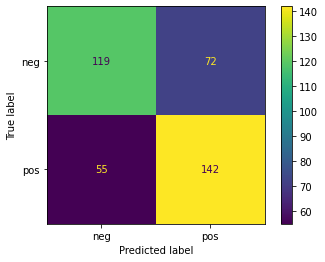

In [105]:
print('KNN model')
report(knn_pipe)

**From the results above, we can see that the LinearSVC model performed best, so we would be making use of it for future predictions.**

## Model Deployment

Now that we're satisfied with the results of our best performing model(LInearSVC), we would use the model to predict some new reviews to see how well it performs on those

In [146]:
new_review = ['This movie was crap']
svc_pipe.predict(new_review)

array(['neg'], dtype=object)

In [147]:
new_review = ['This was a great movie']
svc_pipe.predict(new_review)

array(['pos'], dtype=object)

In [150]:
new_review = ['This was a really shitty movie']
svc_pipe.predict(new_review)

array(['neg'], dtype=object)